In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df = pd.read_csv('../data/visitor-visa-statistics.csv')
print(df.head())
print(df.info())

   reporting_year reporting_state consulate_country consulate_country_code  \
0            2023         Austria           Albania                    ALB   
1            2023         Austria           Algeria                    DZA   
2            2023         Austria         Argentina                    ARG   
3            2023         Austria         Australia                    AUS   
4            2023         Austria        Azerbaijan                    AZE   

     consulate_country_region consulate_country_income_group consulate_city  \
0       Europe & Central Asia            Upper middle income         TIRANA   
1  Middle East & North Africa            Lower middle income        ALGIERS   
2   Latin America & Caribbean            Upper middle income   BUENOS AIRES   
3         East Asia & Pacific                    High income       CANBERRA   
4       Europe & Central Asia            Upper middle income           BAKU   

   visitor_visa_applications  visitor_visa_issued  visit

In [154]:
df["consulate_country_income_group"] = df.groupby("consulate_country_region")["consulate_country_income_group"] \
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Unknown"))

In [155]:
df["visitor_visa_refusal_rate"] = df.groupby("consulate_country")["visitor_visa_refusal_rate"].transform(lambda x: x.fillna(x.mean()))

In [156]:
df_clean = df.dropna(subset=["visitor_visa_refusal_rate"])

In [157]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 reporting_year                    0
reporting_state                   0
consulate_country                 0
consulate_country_code            0
consulate_country_region          0
consulate_country_income_group    0
consulate_city                    0
visitor_visa_applications         0
visitor_visa_issued               0
visitor_visa_not_issued           0
visitor_visa_refusal_rate         0
dtype: int64


In [158]:
#Total visa applications by year
apps_by_year = df.groupby("reporting_year")["visitor_visa_applications"].sum()
print(apps_by_year)

reporting_year
2005    10963570
2006    12751256
2007    12909954
2008    11998782
2009    11309638
2010    12731714
2011    14382126
2012    15130708
2013    17285449
2014    17651861
2015    16148782
2016    15959960
2017    16751482
2018    16505814
2019    17468070
2020     3001189
2021     3192276
2022     7890080
2023    10626925
Name: visitor_visa_applications, dtype: int64


In [159]:
#Average refusal rate by reporting state
refusal_by_state = df.groupby("reporting_state")["visitor_visa_refusal_rate"].mean()
print(refusal_by_state.head())

reporting_state
Austria     0.066938
Belgium     0.176515
Bulgaria    0.079523
Croatia     0.078225
Cyprus      0.055542
Name: visitor_visa_refusal_rate, dtype: float64


In [160]:
#Top 10 consulate countries by applications
top_consulate_countries = df.groupby("consulate_country")["visitor_visa_applications"].sum().nlargest(10)
print(top_consulate_countries)

consulate_country
Russian Federation    69538702
China                 24131838
Ukraine               17684163
Türkiye               14077033
India                 10933319
Belarus               10540739
Algeria                8178032
Morocco                7807055
Saudi Arabia           4637198
United Kingdom         4296941
Name: visitor_visa_applications, dtype: int64


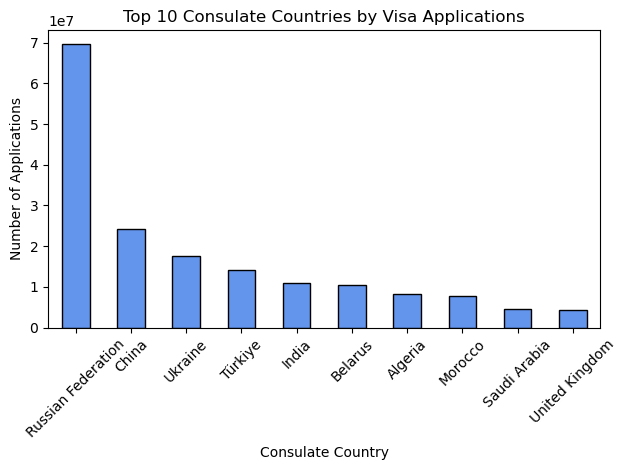

In [223]:
top_consulate_countries.plot(kind="bar", color="cornflowerblue", edgecolor="black")
plt.title("Top 10 Consulate Countries by Visa Applications")
plt.xlabel("Consulate Country")
plt.ylabel("Number of Applications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [161]:
#Visa applications by region
apps_by_region = df.groupby("consulate_country_region")["visitor_visa_applications"].sum()
print(apps_by_region)

consulate_country_region
East Asia & Pacific            36454333
Europe & Central Asia         131671316
Latin America & Caribbean       4830963
Middle East & North Africa     41429664
North America                   2723506
South Asia                     13043309
Sub-Saharan Africa             14506545
Name: visitor_visa_applications, dtype: int64


In [162]:
#Average refusal rate by income group
refusal_by_income = df.groupby("consulate_country_income_group")["visitor_visa_refusal_rate"].mean()
print(refusal_by_income)

consulate_country_income_group
High income            0.067423
Low income             0.221233
Lower middle income    0.197092
Upper middle income    0.089826
Name: visitor_visa_refusal_rate, dtype: float64


In [163]:
#Visas issued by reporting state
issued_by_state = df.groupby("reporting_state")["visitor_visa_issued"].sum()
print(issued_by_state.head())

reporting_state
Austria     4966507
Belgium     2941669
Bulgaria    7277038
Croatia      470140
Cyprus      1198751
Name: visitor_visa_issued, dtype: int64


In [164]:
#Refusal rate by income group
refusal_by_income_group = df.groupby("consulate_country_income_group")["visitor_visa_refusal_rate"].mean()
print(refusal_by_income_group)

consulate_country_income_group
High income            0.067423
Low income             0.221233
Lower middle income    0.197092
Upper middle income    0.089826
Name: visitor_visa_refusal_rate, dtype: float64


In [165]:
#Top 5 consulate cities by applications
top_consulate_cities = df.groupby("consulate_city")["visitor_visa_applications"].sum().nlargest(10)
print(top_consulate_cities)

consulate_city
MOSCOW           47531225
ST PETERSBURG    15104100
BEIJING          10322634
KYIV             10077649
ISTANBUL          9003984
SHANGHAI          8093330
MINSK             7501743
NEW DELHI         5650578
ALGIERS           4940923
LONDON            3934652
Name: visitor_visa_applications, dtype: int64


In [166]:
# average refusal rate has been tracked over the years
refusal_rate_by_year = df.groupby("reporting_year")["visitor_visa_refusal_rate"].mean()
print(refusal_rate_by_year)

reporting_year
2005    0.091324
2006    0.103275
2007    0.098761
2008    0.102524
2009    0.101318
2010    0.111250
2011    0.108871
2012    0.102191
2013    0.101669
2014    0.094624
2015    0.084825
2016    0.092562
2017    0.104046
2018    0.117281
2019    0.122732
2020    0.162220
2021    0.121160
2022    0.140523
2023    0.150813
Name: visitor_visa_refusal_rate, dtype: float64


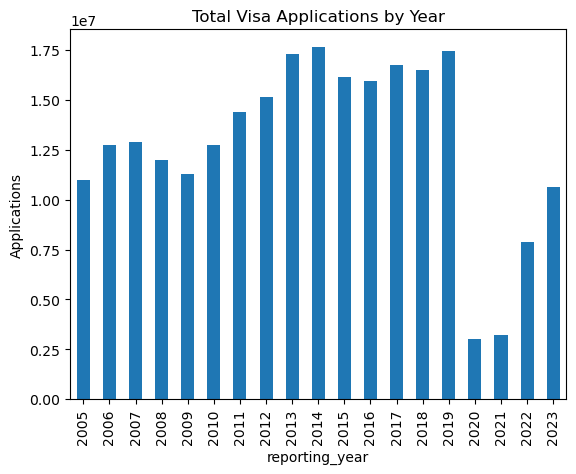

In [167]:
#Total Visa Applications by Year
df.groupby("reporting_year")["visitor_visa_applications"].sum().plot(kind="bar")
plt.title("Total Visa Applications by Year")
plt.ylabel("Applications")
plt.show()

In [168]:
#total number of visa applications not issued has been calculated for each region
not_issued_by_region = df.groupby("consulate_country_region")["visitor_visa_not_issued"].sum()
print(not_issued_by_region)

consulate_country_region
East Asia & Pacific           1634905
Europe & Central Asia         4282776
Latin America & Caribbean      739486
Middle East & North Africa    7135746
North America                   75454
South Asia                    1684758
Sub-Saharan Africa            2971848
Name: visitor_visa_not_issued, dtype: int64


In [169]:
#Average applications by reporting state
avg_apps_by_state = df.groupby("reporting_state")["visitor_visa_applications"].mean()
print(avg_apps_by_state.head())

reporting_state
Austria     3150.344972
Belgium     2312.784933
Bulgaria    5379.625544
Croatia      782.111111
Cyprus      1840.146884
Name: visitor_visa_applications, dtype: float64


In [170]:
#Top 5 countries by issued visas
top_issued_countries = df.groupby("consulate_country")["visitor_visa_issued"].sum().nlargest(10)
print(top_issued_countries)

consulate_country
Russian Federation    68608356
China                 23096781
Ukraine               17163179
Türkiye               12962320
Belarus               10443423
India                  9860722
Morocco                6266755
Algeria                5198771
Saudi Arabia           4377754
United Kingdom         4089922
Name: visitor_visa_issued, dtype: int64


In [171]:
#Top 5 countries with highest refusal rate
top_refusal_countries = df.groupby("consulate_country")["visitor_visa_refusal_rate"].mean().nlargest(10)
print(top_refusal_countries)

consulate_country
Kosovo              0.502489
Guinea              0.436429
Senegal             0.400062
Comoros             0.395982
Ghana               0.387649
Congo, Dem. Rep.    0.382785
Mali                0.364121
Pakistan            0.363453
Nigeria             0.358643
Algeria             0.343940
Name: visitor_visa_refusal_rate, dtype: float64


In [172]:
#Visa applications have been totaled for each income group
apps_by_income = df.groupby("consulate_country_income_group")["visitor_visa_applications"].sum()
print(apps_by_income)

consulate_country_income_group
High income             23869866
Low income               3345374
Lower middle income     70882265
Upper middle income    146562131
Name: visitor_visa_applications, dtype: int64


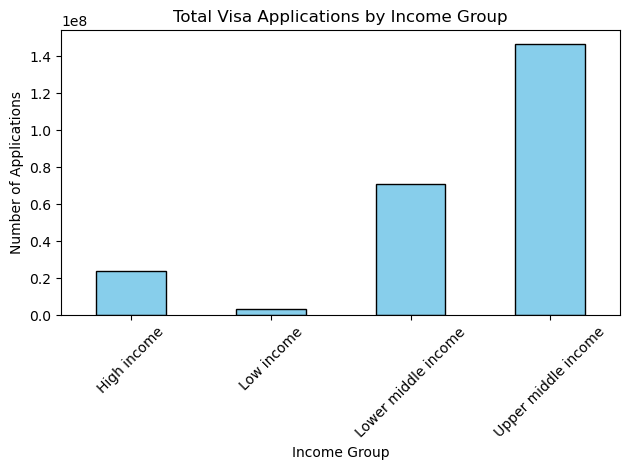

In [221]:
apps_by_income.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Visa Applications by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Number of Applications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [173]:
#The average number of visas issued has been calculated for each city
issued_by_city = df.groupby("consulate_city")["visitor_visa_issued"].mean()
print(issued_by_city.head())

consulate_city
ABIDJAN        3945.438017
ABU DHABI      4091.108824
ABUJA          1024.076923
ACCRA          2005.491228
ADDIS ABABA     818.252560
Name: visitor_visa_issued, dtype: float64


In [174]:
#Top 5 regions by number of not issued visas
top_not_issued_regions = df.groupby("consulate_country_region")["visitor_visa_not_issued"].sum().nlargest(5)
print(top_not_issued_regions)

consulate_country_region
Middle East & North Africa    7135746
Europe & Central Asia         4282776
Sub-Saharan Africa            2971848
South Asia                    1684758
East Asia & Pacific           1634905
Name: visitor_visa_not_issued, dtype: int64


In [175]:
#The mean refusal rate has been analyzed across different consulate regions
refusal_by_region = df.groupby("consulate_country_region")["visitor_visa_refusal_rate"].mean()
print(refusal_by_region)

consulate_country_region
East Asia & Pacific           0.063916
Europe & Central Asia         0.078890
Latin America & Caribbean     0.113428
Middle East & North Africa    0.165507
North America                 0.031353
South Asia                    0.208385
Sub-Saharan Africa            0.212288
Name: visitor_visa_refusal_rate, dtype: float64


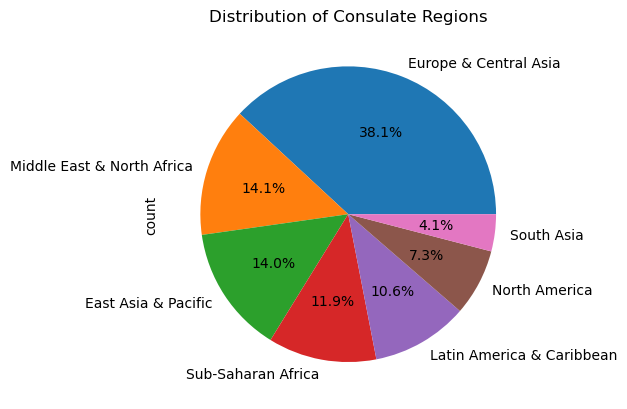

In [176]:
df["consulate_country_region"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Consulate Regions")
plt.show()

In [177]:
#Effect of year on not issued visas
not_issued_by_year = df.groupby("reporting_year")["visitor_visa_not_issued"].sum()
print(not_issued_by_year)

reporting_year
2005     860225
2006     953399
2007     875199
2008     822533
2009     755462
2010     704190
2011     764077
2012     721809
2013     831574
2014     863517
2015     965831
2016    1050321
2017    1324201
2018    1565296
2019    1688798
2020     399798
2021     386267
2022    1341287
2023    1651189
Name: visitor_visa_not_issued, dtype: int64


In [178]:
#Refusal rate by income group and region
refusal_by_income_region = df.groupby(["consulate_country_income_group", "consulate_country_region"])["visitor_visa_refusal_rate"].mean()
print(refusal_by_income_region)

consulate_country_income_group  consulate_country_region  
High income                     East Asia & Pacific           0.049400
                                Europe & Central Asia         0.075337
                                Latin America & Caribbean     0.106085
                                Middle East & North Africa    0.092207
                                North America                 0.031353
                                Sub-Saharan Africa            0.019034
Low income                      East Asia & Pacific           0.098156
                                Middle East & North Africa    0.231232
                                South Asia                    0.190597
                                Sub-Saharan Africa            0.227053
Lower middle income             East Asia & Pacific           0.099905
                                Europe & Central Asia         0.071019
                                Latin America & Caribbean     0.112836
                  

In [179]:
#Total visas issued have been summed and presented per year
issued_by_year = df.groupby("reporting_year")["visitor_visa_issued"].sum()
print(issued_by_year)

reporting_year
2005    10532992
2006    11783016
2007    12376947
2008    11514824
2009    10490951
2010    11915530
2011    13517965
2012    14163329
2013    16184346
2014    16598211
2015    14999374
2016    14697919
2017    15242461
2018    14728000
2019    15523012
2020     2560946
2021     2653676
2022     6232363
2023     8774037
Name: visitor_visa_issued, dtype: int64


In [180]:
#Refusal rate by year and state
refusal_by_year_state = df.groupby(["reporting_year", "reporting_state"])["visitor_visa_refusal_rate"].mean()
print(refusal_by_year_state.head())

reporting_year  reporting_state
2005            Austria            0.047668
                Belgium            0.169672
                Cyprus             0.066542
                Czechia            0.053537
                Denmark            0.146030
Name: visitor_visa_refusal_rate, dtype: float64


In [181]:
#Cities with the highest visa refusal rates have been identified
top_refusal_cities = df.groupby("consulate_city")["visitor_visa_refusal_rate"].mean().nlargest(10)
print(top_refusal_cities)

consulate_city
SFAX         0.535198
PRISTINA     0.487211
CONAKRY      0.436429
MORONI       0.432218
DAKAR        0.402220
ANNABA       0.401621
KINSHASA     0.392848
LAGOS        0.388219
ISLAMABAD    0.387892
ACCRA        0.387649
Name: visitor_visa_refusal_rate, dtype: float64


In [182]:
#number of refused applications has been grouped and summed by region
not_issued_by_region_dist = df.groupby("consulate_country_region")["visitor_visa_not_issued"].sum()
print(not_issued_by_region_dist)

consulate_country_region
East Asia & Pacific           1634905
Europe & Central Asia         4282776
Latin America & Caribbean      739486
Middle East & North Africa    7135746
North America                   75454
South Asia                    1684758
Sub-Saharan Africa            2971848
Name: visitor_visa_not_issued, dtype: int64


In [183]:
#Average issued applications by country
refusal_by_year_region = df.groupby(["reporting_year", "consulate_country_region"])["visitor_visa_refusal_rate"].mean()
print(refusal_by_year_region.head())

reporting_year  consulate_country_region  
2005            East Asia & Pacific           0.078573
                Europe & Central Asia         0.058497
                Latin America & Caribbean     0.105115
                Middle East & North Africa    0.140475
                North America                 0.029038
Name: visitor_visa_refusal_rate, dtype: float64


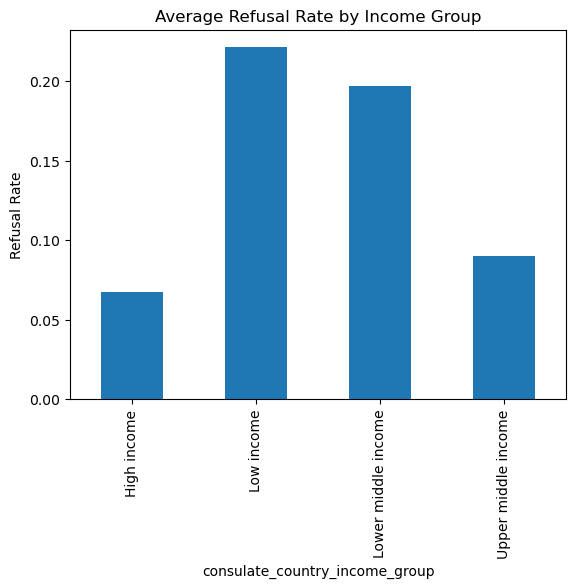

In [184]:
#Average Refusal Rate by Income Group
df.groupby("consulate_country_income_group")["visitor_visa_refusal_rate"].mean().plot(kind="bar")
plt.title("Average Refusal Rate by Income Group")
plt.ylabel("Refusal Rate")
plt.show()

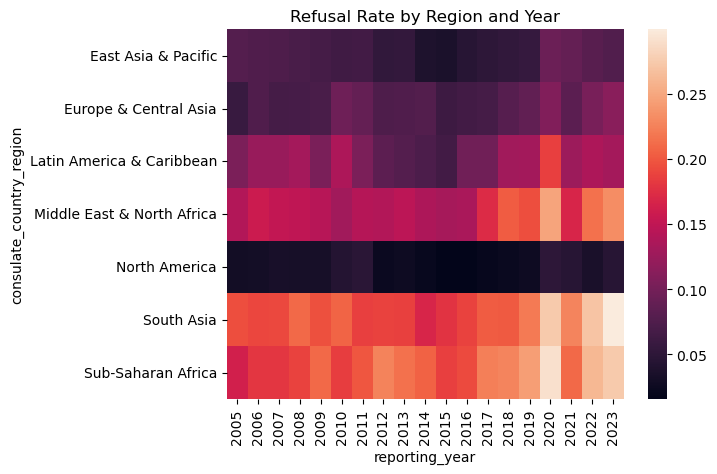

In [185]:
#Heatmap of refusal rate by year and region
pivot = df.pivot_table(values="visitor_visa_refusal_rate", index="consulate_country_region", columns="reporting_year", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Refusal Rate by Region and Year")
plt.show()